# Forbes Billionaires 2022 Exploratory Data Analysis

### Import Python libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

In [2]:
#import csv file  
bade_log = '2022_forbes_billionaires.csv'
df= pd.read_csv(bade_log)

In [3]:
df.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


### Data Cleaninng

In [4]:
#first we do data cleaning of all 3 
dxa =df[['country',  'industry', 'source']]
dxa.head(5)

,country,industry,source
0,United States,Automotive,"Tesla, SpaceX"
1,United States,Technology,Amazon
2,France,Fashion & Retail,LVMH
3,United States,Technology,Microsoft
4,United States,Finance & Investments,Berkshire Hathaway


In [5]:

data101 =['country',  'industry', 'source']
for i in range(len(data101)):
    list_1 = pd.DataFrame({''f'{data101[i]}': (df[data101[i]].value_counts())})
    print(list_1.head(20))

                country
United States       719
China               515
India               161
Germany             130
Russia               81
Hong Kong            67
Canada               64
Brazil               60
Italy                52
Taiwan               51
United Kingdom       49
Sweden               45
Australia            44
France               43
Switzerland          41
South Korea          41
Japan                36
Indonesia            30
Israel               29
Thailand             28
                             industry
Finance & Investments             386
Technology                        329
Manufacturing                     322
Fashion & Retail                  246
Healthcare                        212
Food & Beverage                   201
Real Estate                       189
Diversified                       178
Media & Entertainment              95
Energy                             93
Automotive                         69
Metals & Mining                    67
Se

## Country with most billionaires

In [6]:
desh = df[data101[0]].value_counts().rename_axis('country').reset_index(name = 'Total')
desh.head()

,country,Total
0,United States,719
1,China,515
2,India,161
3,Germany,130
4,Russia,81


#### The most billionaires are from USA followed by china and then India.

### Billionaires Profession Distribution

In [7]:
list_industry = df[data101[1]].value_counts().rename_axis('industry').reset_index(name ='Total_Industry')
list_industry.head(5)

,industry,Total_Industry
0,Finance & Investments,386
1,Technology,329
2,Manufacturing,322
3,Fashion & Retail,246
4,Healthcare,212


#### According to this profession distribution most of billionaires are from Finance & Investment and followed by Technology , But Technology will be on top within 5 Year. The growth of IT industry  digitalization of country and dependancy on technology will increase in coming year

In [8]:
list_industry.tail()

,industry,Total_Industry
13,Construction & Engineering,43
14,Logistics,35
15,Telecom,35
16,Sports,26
17,Gambling & Casinos,23


#### Gambling & Casinos is the least owned by billionaires also the number of gambling and casionos will decline in future

### Data Visualization
#### Now we use seaborn to visualize about industry owned by billionaires

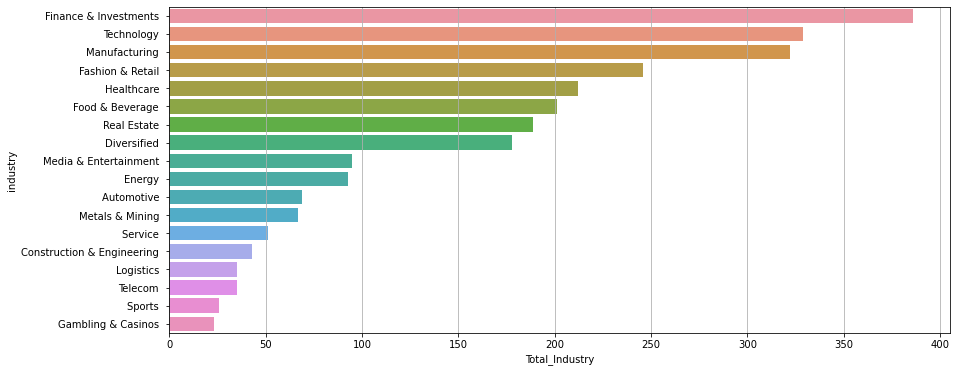

In [9]:
plt.figure(figsize=(14,6))
sns.barplot(y = 'industry' ,x = 'Total_Industry' ,data = list_industry)
plt.grid(axis ='x')


In [10]:
list_industry_02 = list_industry['industry'].tolist()
list_industry_02

['Finance & Investments ',
 'Technology ',
 'Manufacturing ',
 'Fashion & Retail ',
 'Healthcare ',
 'Food & Beverage ',
 'Real Estate ',
 'Diversified ',
 'Media & Entertainment ',
 'Energy ',
 'Automotive ',
 'Metals & Mining ',
 'Service ',
 'Construction & Engineering ',
 'Logistics ',
 'Telecom ',
 'Sports ',
 'Gambling & Casinos ']

In [11]:
#remane networth to Networth $B
df.rename(columns = {'networth': 'networth $B'}, inplace= True )

#Rename '$' ,'B' in the value given in 'Networth' column.
df['networth $B'] = df['networth $B'].str.replace('[^\d.]','')


C:\Users\91808\AppData\Local\Temp/ipykernel_4176/2106080088.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['networth $B'] = df['networth $B'].str.replace('[^\d.]','')


In [12]:
df.head()

,Unnamed: 0,rank,name,networth $B,age,country,source,industry
0,0,1,Elon Musk,219,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118,91,United States,Berkshire Hathaway,Finance & Investments


In [13]:
# We have to change the value of networth into float
df['networth $B'] = pd.to_numeric(df['networth $B'], errors = 'coerce')
df.head()

,Unnamed: 0,rank,name,networth $B,age,country,source,industry
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


In [14]:
#now check data type
df['networth $B'].dtype

dtype('float64')

##### Now find out how much particular industry make money in Billion Doller

In [15]:
total  = []
total_sum_industry = 0
for i in range(len(list_industry_02)):
    total_sum_industry = df.loc[df['industry'] == list_industry_02[i],'networth $B'].sum()
    total.append(total_sum_industry)


#insert total columns
list_industry.insert(2,'Total $B',total )

In [16]:
list_industry

,industry,Total_Industry,Total $B
0,Finance & Investments,386,1734.30
1,Technology,329,2168.40
2,Manufacturing,322,1079.80
3,Fashion & Retail,246,1613.20
4,Healthcare,212,708.90
5,Food & Beverage,201,933.35
6,Real Estate,189,685.80
7,Diversified,178,939.50
8,Media & Entertainment,95,493.60
9,Energy,93,395.30


#### Above are the total collection of money in billions USD from distinct industry .As we can easily get data that technology have bigger hand as compare to Finance & Investment

### Visualizing the combined most valuable industries

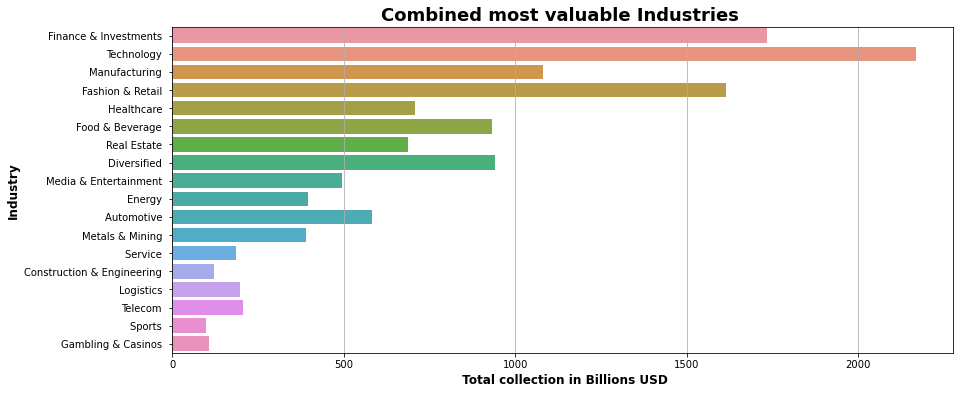

In [17]:
plt.figure(figsize=(14,6))
sns.barplot(y ='industry' , x = 'Total $B' ,data =list_industry)
plt.grid(axis ='x')
plt.title('Combined most valuable Industries ' , weight = 'bold' ,size = 18)
plt.xlabel(' Total collection in Billions USD', weight = 'bold' , size = 12)
plt.ylabel('Industry', weight = 'bold' , size = 12);


#### Its easily visualize that Technology is leading the market in race of combined most valuable industries.During the Covid outbreak we have witnessed about the impact of technoloy in human life. 

### Comparison of Industries run by Americans and Chinese

In [18]:
desh_usa= df[df['country']=='United States']['industry'].value_counts().rename_axis('industry').reset_index(name= 'USA')
desh_china= df[df['country']=='China']['industry'].value_counts().rename_axis('industry').reset_index(name = 'China')
desh_india = df[df['country']=='India']['industry'].value_counts().rename_axis('industry').reset_index(name= 'india')

ds_usa_china = pd.merge(desh_usa,desh_china, on = 'industry', how = 'left')
ds_china_india = pd.merge(desh_china,desh_india, on = 'industry', how = 'left')

In [19]:
ds_usa_china

,industry,USA,China
0,Finance & Investments,193,10.0
1,Technology,137,81.0
2,Food & Beverage,63,45.0
3,Fashion & Retail,53,29.0
4,Real Estate,46,32.0
5,Media & Entertainment,41,11.0
6,Energy,32,20.0
7,Healthcare,32,69.0
8,Manufacturing,25,142.0
9,Sports,24,NaN


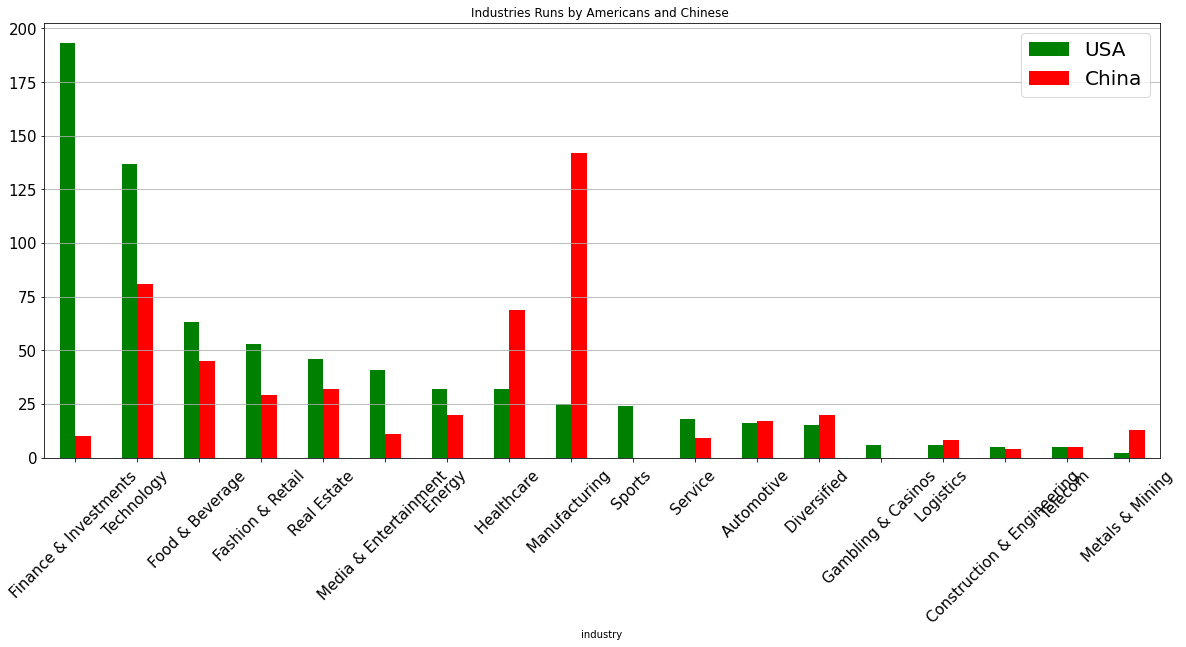

In [20]:
ax= ds_usa_china[['industry' ,'USA', 'China']].plot(x= 'industry',
                                                             kind = 'bar',
                                                             color = ['g','r'],
                                                             rot = 45,
                                                             figsize = (20,8),
                                                             title= 'Industries Runs by Americans and Chinese '
                                                    ,fontsize =15
                                                   )
ax.legend(['USA' ,'China'], fontsize =20);
plt.grid(axis ='y')


                                                    

#### American have more billionaires as compared to china but  chinses leading in sector like Healtcare, manufacturing ,Automotive ,metals and mining

In [21]:
ds_china_india

,industry,China,india
0,Manufacturing,142,31
1,Technology,81,16
2,Healthcare,69,30
3,Food & Beverage,45,10
4,Real Estate,32,8
5,Fashion & Retail,29,15
6,Energy,20,1
7,Diversified,20,16
8,Automotive,17,9
9,Metals & Mining,13,3


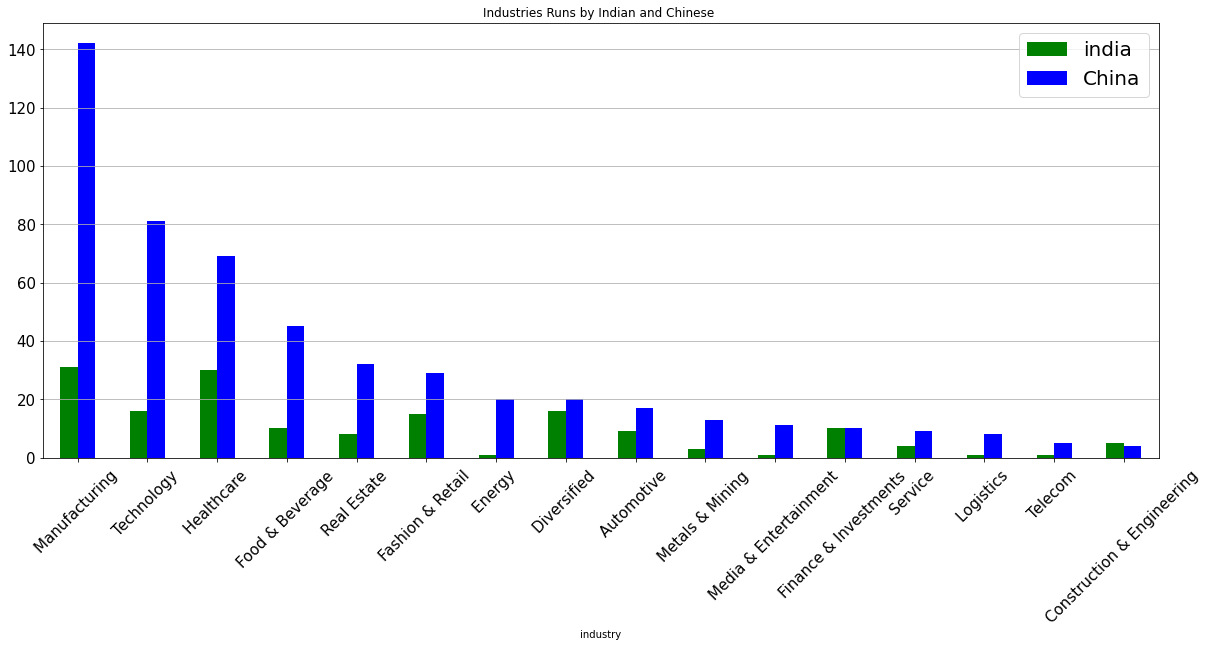

In [22]:
ax= ds_china_india[['industry' ,'india', 'China']].plot(x= 'industry',
                                                             kind = 'bar',
                                                             color = ['g','b'],
                                                             rot = 45,
                                                             figsize = (20,8),
                                                             title= 'Industries Runs by Indian and Chinese '
                                                    ,fontsize =15
                                                   )
ax.legend(['india' ,'China'], fontsize =20);
plt.grid(axis ='y')

#### India and china are two neighbour country with bitter relationships.here we can see chinese billionaires are step adead of indian billionaires in approx all the sector except Construction & Engineering 